In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyautogui
import numpy as np
from PIL import Image
from time import sleep
from glob import glob
import cv2

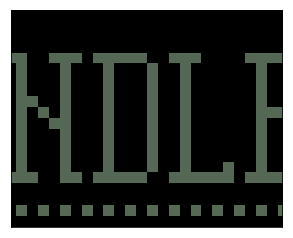

In [105]:
im = pyautogui.screenshot(region=(600, 580, 50, 40))
plt.subplot(1,1,1), plt.title(''), plt.xticks([]), plt.yticks([]), plt.imshow(im);

In [15]:
type(im)

PIL.Image.Image

In [106]:
import os
if not os.path.exists('anchors'): os.mkdir('anchors')
if not os.path.exists('anchors/received-docs'): os.mkdir('anchors/received-docs')
im.save('anchors/endless.png')

In [2]:
# find origin coordinates
im = pyautogui.screenshot()
im2 = Image.open('anchors/endless.png')
result = cv2.matchTemplate(np.array(im2), np.array(im), cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(result)
max_val, max_loc

(0.9999997615814209, (1295, 569))

In [3]:
offset = max_loc[0] - 600, max_loc[1] - 580
def click(x, y):
    global offset
    pyautogui.moveTo(offset[0]+x, offset[1]+y)
    pyautogui.click()

# start game
if max_val > 0.999:
    click(625, 600)
    sleep(2)
    click(932, 206)
    click(543, 461)
    click(637, 631)

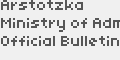

In [5]:
sleep(2)
#pyautogui.position()
im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60));im

In [54]:
im.save('anchors/bulletin.png')

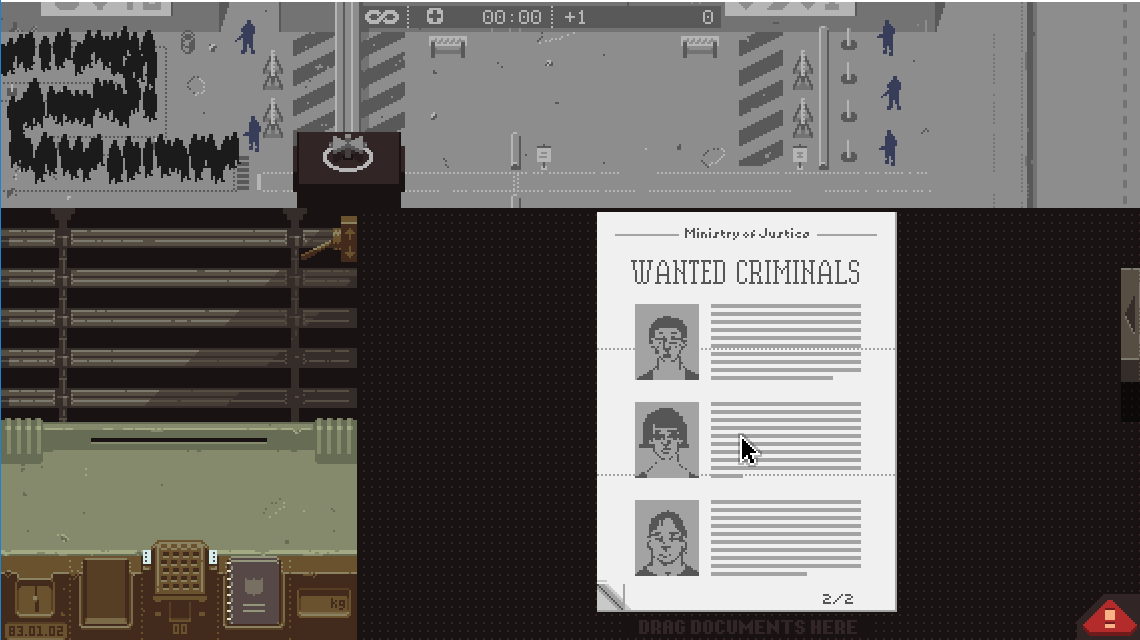

In [9]:
# screenshot for wanted criminals
def resume():
    click(803, 484)
    pyautogui.press('esc')
    sleep(0.5)
resume()

im = pyautogui.screenshot(region=(offset[0]+670, offset[1]+276, 120, 60))
im2 = Image.open('anchors/bulletin.png')
if (np.array(im) == np.array(im2)).all():
    pyautogui.move(1,1)
    pyautogui.press('right')
    wanted_criminals = pyautogui.screenshot(region=(offset[0]+64, offset[1]+50, 1140, 640))
    pyautogui.press('left')
else:
    wanted_criminals = None
wanted_criminals

In [10]:
# put instructions away
resume()
pyautogui.dragTo(offset[0]+177, offset[1]+638, button='left', duration=0.4)

In [11]:
resume()
def call_next():
    click(415, 200)
    sleep(6)
call_next()

In [ ]:
resume()
def received_docs():
    return pyautogui.screenshot(region=(offset[0]+67, offset[1]+479, 417-67, 599-479))
docs = received_docs()
docs

In [138]:
docs.save('anchors/received-docs/antegria-permit.png')

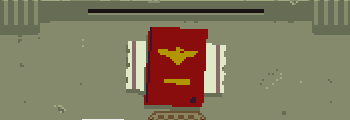

In [140]:
resume()
docs = received_docs()
docs

In [141]:
docs.save('anchors/received-docs/obristan-permit.png')

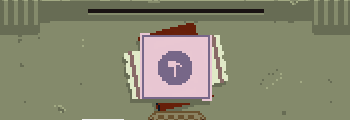

In [142]:
resume()
docs = received_docs()
docs

In [143]:
docs.save('anchors/received-docs/impor-workpass.png')

In [161]:
def received_docs_options():
    return {f.split('/')[-1].split('.')[0]: Image.open(f) for f in glob('anchors/received-docs/*.png')} 
received_docs_options()

{'antegria-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFEB8>,
 'impor-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF8D0>,
 'obristan-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDF9B0>,
 'obristan-workpass': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFFD0>,
 'republia-permit': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=350x120 at 0x7F5D90CDFE80>}

In [165]:
def received_docs_type(docs=None):
    docs = docs or received_docs()
    for t, val in received_docs_options().items():
        if (np.array(val) == np.array(docs)).all():
            return t
    return None

In [156]:
resume()
received_docs_type()

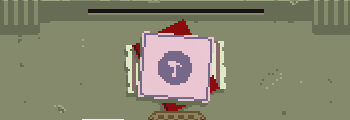

In [155]:
resume()
docs = received_docs()
docs

In [157]:
docs.save('anchors/received-docs/obristan-workpass.png')

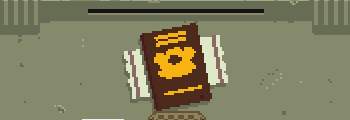

In [158]:
resume()
docs = received_docs()
docs

In [159]:
docs.save('anchors/received-docs/republia-permit.png')

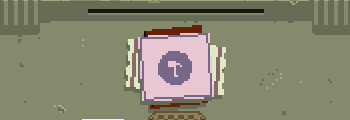

In [167]:
resume()
docs = received_docs()
docs

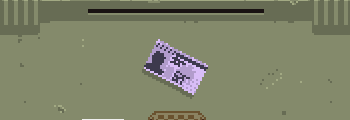

In [169]:
resume()
docs = received_docs()
docs

In [170]:
docs.save('anchors/received-docs/arstotzka-id.png')

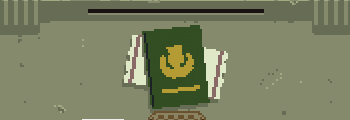

In [172]:
resume()
docs = received_docs()
docs

In [173]:
resume()
received_docs_type()

Oh no! Documents are not always handed in the same rotation!

In [118]:
pyautogui.position()

Point(x=417, y=599)